# Principal Component Analysis from Scratch

In [1]:
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

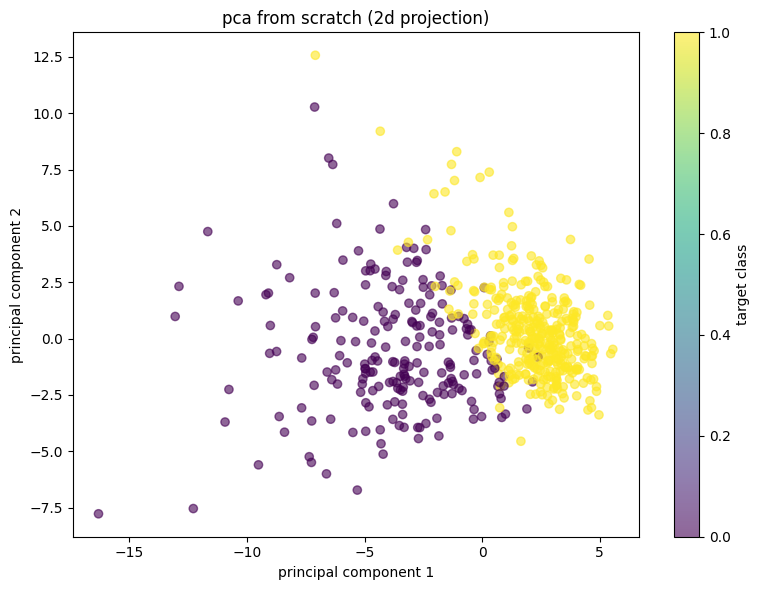

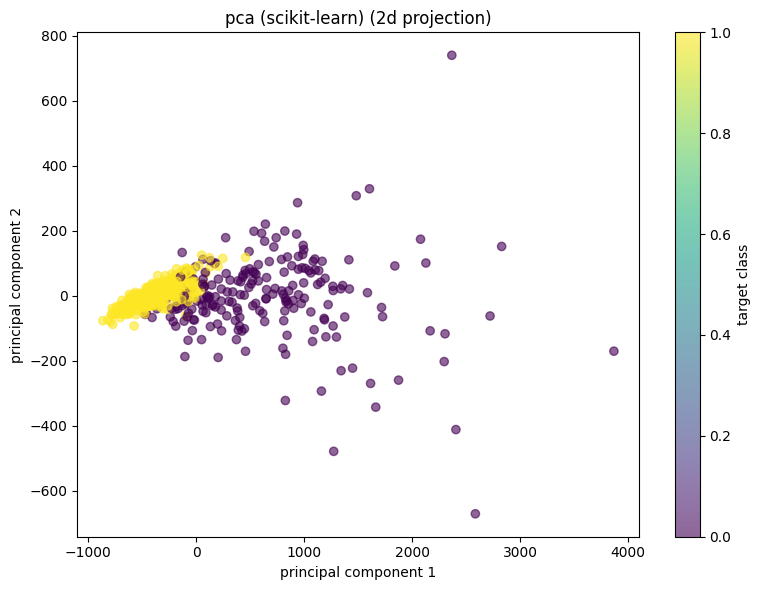

explained variance ratio (from scratch): [0.44272026 0.18971182]
explained variance ratio (scikit-learn): [0.98204467 0.01617649]


In [2]:
# 1. pca from scratch
class PCAFromScratch:
    def __init__(self, n_components=2):
        self.n_components = n_components  # number of components to retain

    def fit(self, X):
        # step 1: standardize the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        self.std = np.std(X_centered, axis=0)
        X_standardized = X_centered / self.std
        
        # step 2: compute the covariance matrix
        covariance_matrix = np.cov(X_standardized.T)
        
        # step 3: compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        
        # step 4: sort the eigenvalues in decreasing order and sort the eigenvectors accordingly
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[sorted_indices]
        self.eigenvectors = eigenvectors[:, sorted_indices]
        
        # step 5: select the top 'n_components' eigenvectors
        self.components = self.eigenvectors[:, :self.n_components]

    def transform(self, X):
        # project the data onto the selected principal components
        X_centered = X - self.mean
        X_standardized = X_centered / self.std
        return np.dot(X_standardized, self.components)

# 2. load dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # labels

# 3. apply pca from scratch
pca_scratch = PCAFromScratch(n_components=2)
pca_scratch.fit(X)
X_pca_scratch = pca_scratch.transform(X)

# 4. apply pca from scikit-learn
sklearn_pca = sklearnPCA(n_components=2)
X_pca_sklearn = sklearn_pca.fit_transform(X)

# 5. plot the results
plt.figure(figsize=(8, 6))

# plot pca from scratch
plt.scatter(X_pca_scratch[:, 0], X_pca_scratch[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title('pca from scratch (2d projection)')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar(label='target class')
plt.tight_layout()
plt.show()

# plot pca using scikit-learn
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title('pca (scikit-learn) (2d projection)')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar(label='target class')
plt.tight_layout()
plt.show()

# 6. compare the explained variance ratio
print(f"explained variance ratio (from scratch): {pca_scratch.eigenvalues[:2] / np.sum(pca_scratch.eigenvalues)}")
print(f"explained variance ratio (scikit-learn): {sklearn_pca.explained_variance_ratio_}")
